In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

In [2]:
df = pd.read_csv(filepath_or_buffer = 'slope_data.csv', index_col = False) 

In [3]:
def plot_params():
    size = 40
    a = plt.rc('xtick', labelsize = size)
    b = plt.rc('ytick', labelsize = size)
    return a, b, size

In [10]:
def make_bar_chart(df, quant1, quant2, y_label):
    a, b, label_size = plot_params()

    N = len(df)
    before_diff = df[quant1].tolist()
    after_diff = df[quant2].tolist()

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35      # the width of the bars

    fig, ax = plt.subplots(figsize=(20, 10), facecolor='white', frameon=False)
    #plt.box(on='off')
    rects1 = ax.bar(ind, before_diff, width, color='#bdbdbd', edgecolor = "none")
    rects2 = ax.bar(ind + width, after_diff, width, color='#979797', edgecolor = "none")

    # add some text for labels, title and axes ticks
    ax.set_ylabel(y_label, size = label_size)
    ax.set_title(' ')
    ax.set_xticks(ind + width)
    tick_labels = df['pod'].tolist()
    ax.set_xticklabels(tick_labels)
    ax.grid(False)
    plt.ylim([0,18])
    #make the border lines lighter
    [i.set_linewidth(0.1) for i in ax.spines.itervalues()]

    #remove the y axis
    #frame1 = plt.gca()
    #frame1.axes.get_yaxis().set_visible(False)

    #draw legend
    ax.legend( (rects1[0], rects2[0]), ('Base Features', 'Best Features') , loc = 'best', fontsize = label_size, frameon=False)

    plt.show()

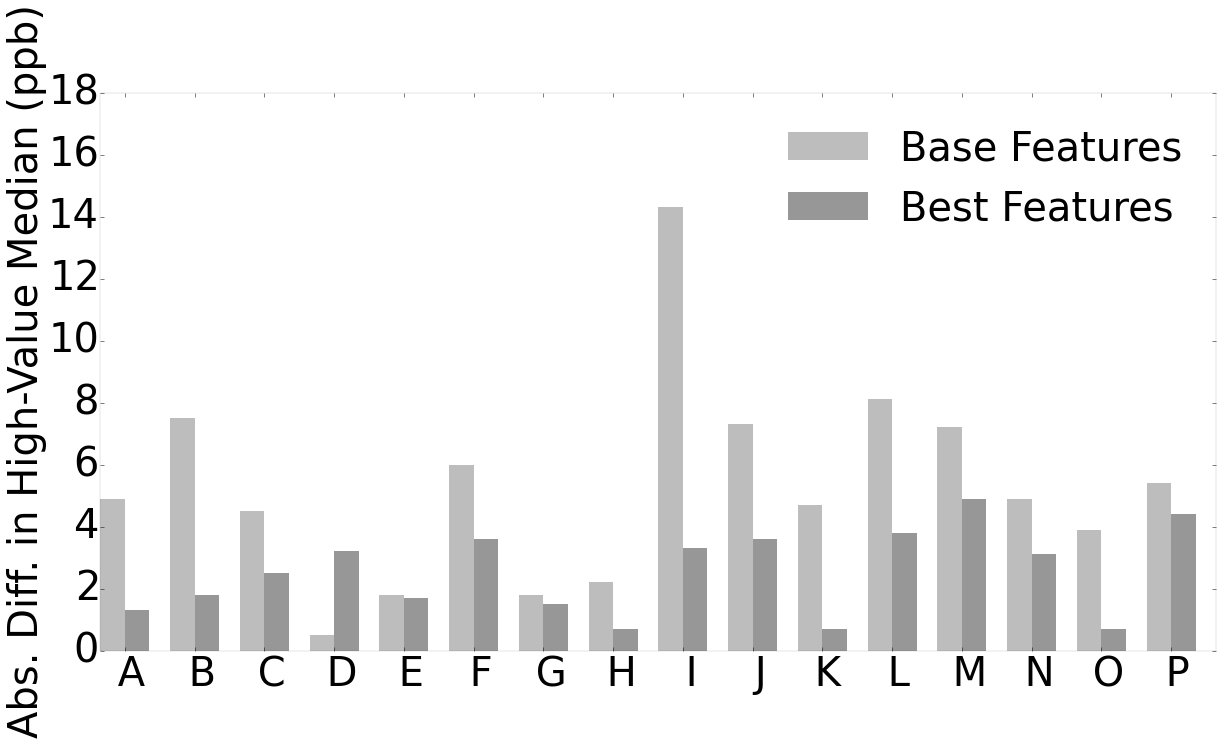

In [11]:
make_bar_chart(df, 'base_abs_diff', 'best_abs_diff', 'Abs. Diff. in High-Value Median (ppb)')

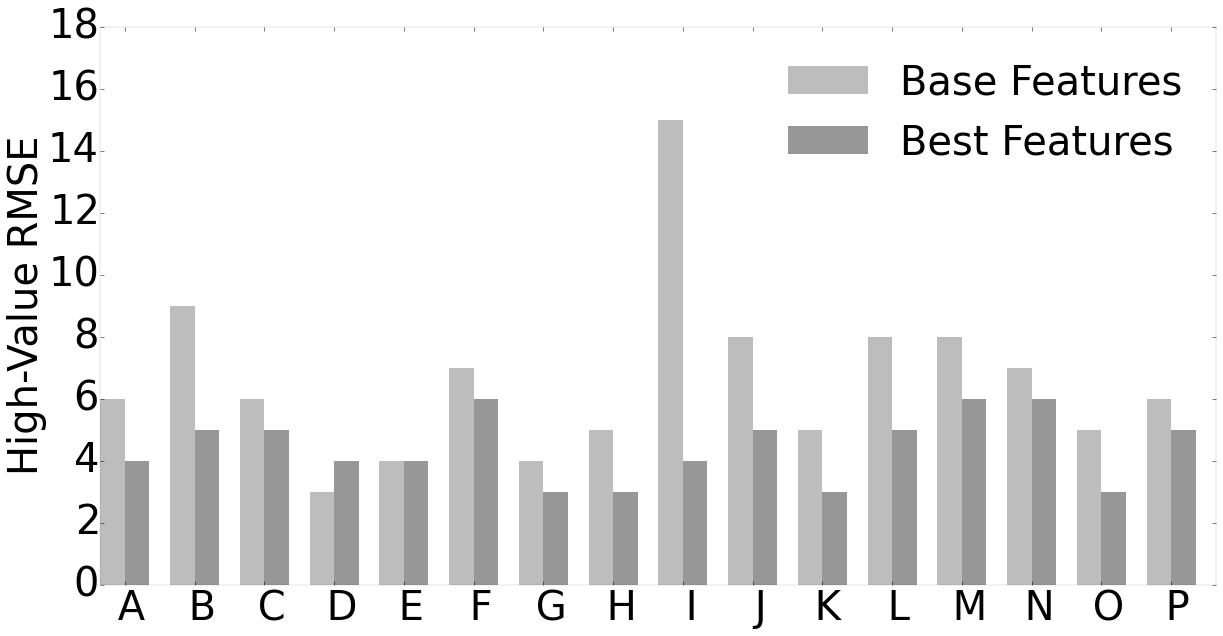

In [12]:
make_bar_chart(df, 'base_high_mse', 'best_high_mse', "High-Value RMSE")

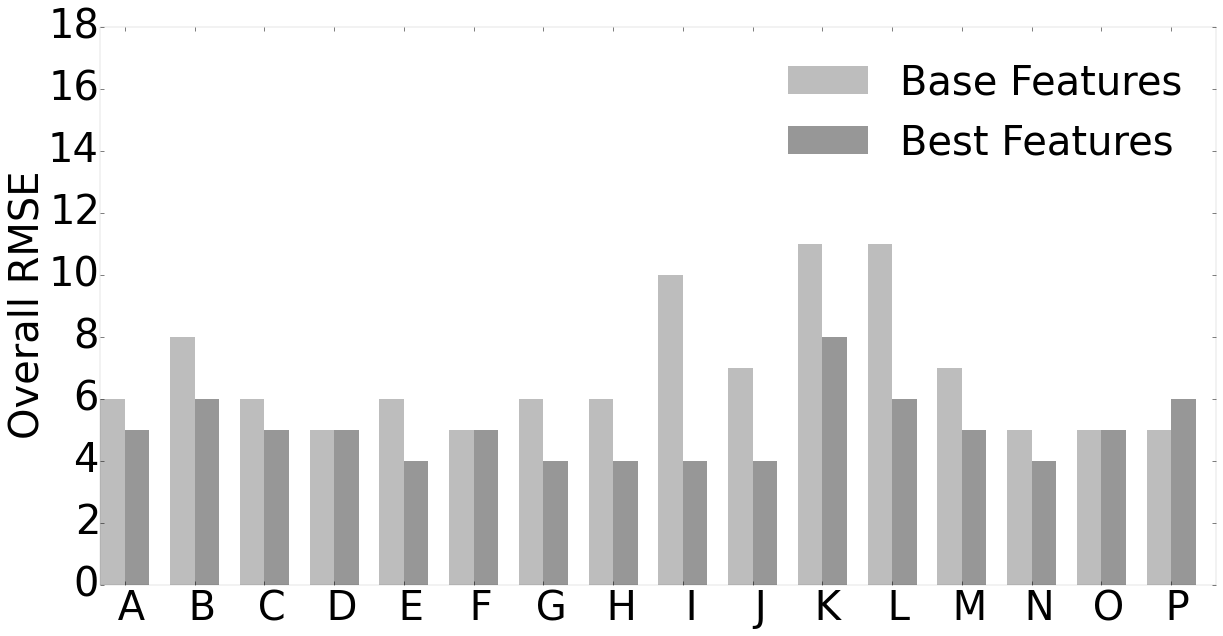

In [13]:
make_bar_chart(df, 'base_mse', 'best_mse', 'Overall RMSE')

#Import box plot data.

In [32]:
df_box = pd.read_csv(filepath_or_buffer = 'box_plot_data.csv', index_col = False) 

In [33]:
df_box

,pod,base,best,ridge,lasso,svm,chosen
0,D3,4.9,1.3,0.9,2.2,1.0,1.3
1,D0,7.5,0.6,0.3,1.8,0.2,1.8
2,D4,4.5,2.5,4.0,3.6,4.4,2.5
3,D8,0.5,3.2,6.3,5.9,5.5,3.2
4,F3,1.8,1.7,1.9,4.9,3.3,1.7
5,D6,6.0,3.6,7.3,6.7,8.5,3.6
6,F4,1.8,1.5,0.8,0.1,0.4,1.5
7,F7,2.2,1.6,4.7,0.7,7.3,0.7
8,F5,14.3,3.1,6.7,3.3,0.5,3.3
9,F6,7.3,3.6,4.3,6.3,5.1,3.6


[None, None, None, None]

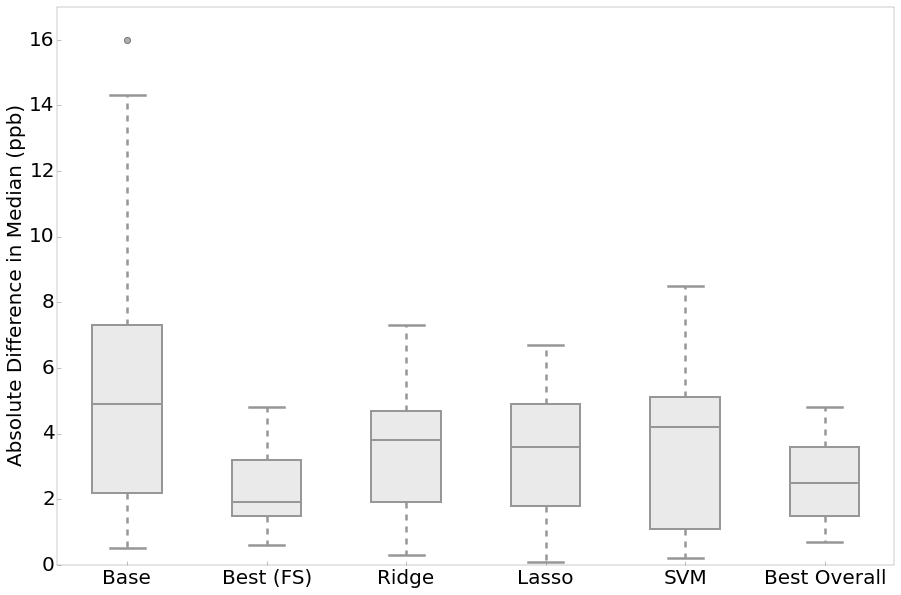

In [69]:
data = [df_box['base'], df_box['best'], df_box['ridge'], df_box['lasso'], df_box['svm'], df_box['chosen']]
fig = plt.figure(1, figsize=(15, 10), facecolor='white')
ax = fig.add_subplot(111)
plt.ylim([0,17])
bp = ax.boxplot(data, 0,'gD', patch_artist=True)
ax.set_ylabel('Absolute Difference in Median (ppb)', fontsize = 20)


for box in bp['boxes']:
    # change outline color
    box.set( color='#979797', linewidth=2)
    # change fill color
    box.set( facecolor = '#eaeaea' )
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#979797', linewidth=2.5)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#979797', linewidth=2.5)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#979797', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#979797', alpha = 0.8)
    
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

## Custom x-axis labels
ax.set_xticklabels(['Base', 'Best (FS)', 'Ridge', 'Lasso', 'SVM', 'Best Overall'], fontsize = 20, color = 'black')
ax.set_yticklabels(['0','2', '4', '6', '8', '10', '12', '14', '16', '18'], fontsize = 20, color = 'black')

#make the border lines lighter
[i.set_linewidth(0.2) for i in ax.spines.itervalues()]
